[System] GitHub 데이터 경로 설정 중...
[System] 설정 완료. 데이터 소스: GitHub
[System] 설정 완료. 데이터 소스: GitHub

[Step 1] 데이터 로드 중...
  > Load Success: 서울특별시 종로구_보안등.csv (cp949)
  > Load Success: 서울특별시+도봉구_보안등정보_20170517_1495166022473_962364.csv (cp949)
  > Load Success: 서울특별시 서대문구_가로등 현황_20240101.csv (cp949)
  > Load Success: 소상공인_상가_서울_3개구_원본.csv (utf-8)
  > Load Success: 행정구역(동별)_20251111232059.csv (utf-8)
[Step 1] 데이터 로드 완료.

[Step 2] 데이터 전처리 수행


/tmp/ipython-input-649613342.py:163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_night_biz['통합_동이름'] = df_night_biz['행정동명'].astype(str).str.strip()
/tmp/ipython-input-649613342.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_night_biz['통합_동이름'] = df_night_biz['통합_동이름'].replace(jongno_mapping)
/tmp/ipython-input-649613342.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

  > 전처리 완료 (보안등/상권/면적)

--- [5단계] 데이터 병합 수행 ---
--- [5단계] df_final 생성 완료 ---
   행정동명    면적  보안등_개수  구_이름  야간업소_개수       보안등_밀도     야간업소_밀도
0   가회동  0.54     402   종로구       39   744.444444   72.222222
1   교남동  0.35     444   종로구       26  1268.571429   74.285714
2  남가좌동  1.28     354  서대문구      164   276.562500  128.125000
3  도봉1동  8.72    1043   도봉구      130   119.610092   14.908257
4  도봉2동  0.83     346   도봉구       75   416.867470   90.361446

--- [6단계] 분석 및 시각화 시작 ---
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.

[구별 상관계수 분석]
 > 종로구: Correlation = 0.382
 > 도봉구: Correlation = 0.561
 > 서대문구: Correlation = 0.107

--- [6단계] 시각화 완료 (analysis_result_final.png) ---


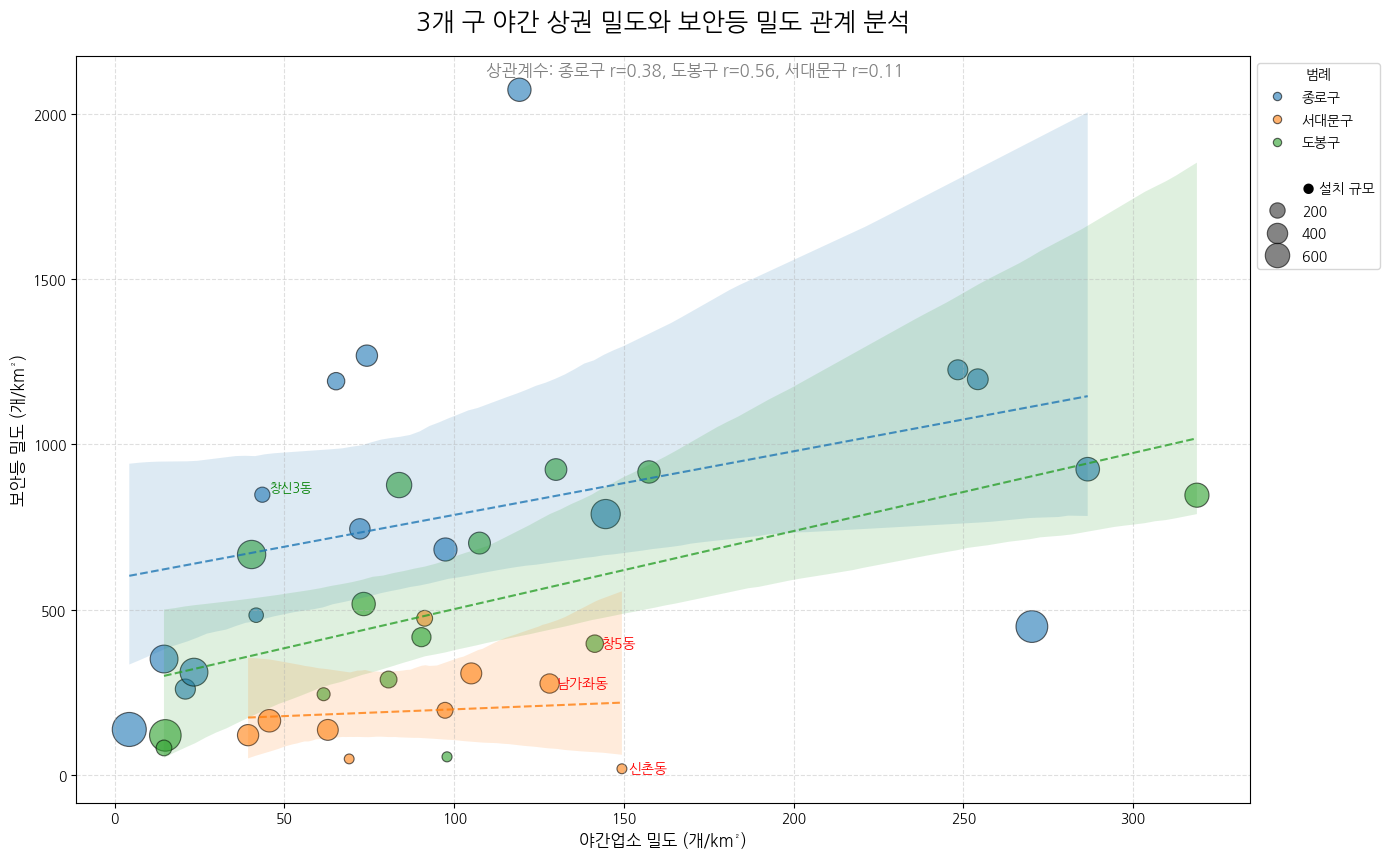

In [14]:
# 환경설정 및 라이브러리 로드
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
import numpy as np
import platform
import os
import io
import requests
import urllib.parse

# GitHub Raw Data URL 설정
print("[System] GitHub 데이터 경로 설정 중...")

GITHUB_ID = "computerprogrammer2025"
REPO_NAME = "Seoul_Night_Safety_Analysis"
DATA_FOLDER = "GitHub_제출용_데이터셋"

# URL 인코딩 처리
encoded_folder = urllib.parse.quote(DATA_FOLDER)
BASE_URL = f"https://raw.githubusercontent.com/{GITHUB_ID}/{REPO_NAME}/main/{encoded_folder}/"

# 파일명
FILE_JONGNO = "서울특별시 종로구_보안등.csv"
FILE_DOBONG = "서울특별시+도봉구_보안등정보_20170517_1495166022473_962364.csv"
FILE_SEODAEMUN = "서울특별시 서대문구_가로등 현황_20240101.csv"
FILE_SANGGA = "소상공인_상가_서울_3개구_원본.csv"
FILE_AREA = "행정구역(동별)_20251111232059.csv"



print(f"[System] 설정 완료. 데이터 소스: GitHub")



# 분석 대상 야간 업소 정의
target_night_biz = [
    '편의점', '요리 주점', '일반 유흥 주점', '생맥주 전문',
    '무도 유흥 주점', '노래방', 'PC방', '셀프 빨래방',
    '아이스크림 할인점', '치킨', '김밥/만두/분식'
]
print(f"[System] 설정 완료. 데이터 소스: GitHub")


# -----------------------------------------------------------
# [함수] 데이터 로드
# -----------------------------------------------------------
def load_data_from_github(filename):
    file_url = BASE_URL + urllib.parse.quote(filename)
    try:
        response = requests.get(file_url)
        response.raise_for_status()
        encodings = ['utf-8', 'cp949', 'euc-kr']
        for enc in encodings:
            try:
                df = pd.read_csv(io.BytesIO(response.content), encoding=enc)
                print(f"  > Load Success: {filename} ({enc})")
                return df
            except UnicodeDecodeError:
                continue
        return None
    except Exception as e:
        print(f"  > Download Failed: {filename} ({e})")
        return None


#################################################################
# [Step 1] 데이터 로드
#################################################################
print("\n[Step 1] 데이터 로드 중...")
df_jongno = load_data_from_github(FILE_JONGNO)
df_dobong = load_data_from_github(FILE_DOBONG)
df_seodaemun = load_data_from_github(FILE_SEODAEMUN)
df_sangga = load_data_from_github(FILE_SANGGA)
df_area = load_data_from_github(FILE_AREA)


# 데이터 로드 검증
if any(df is None for df in [df_jongno, df_dobong, df_seodaemun, df_sangga, df_area]):
    print("\n[!!! Critical Error] 데이터 로드 실패! GitHub 설정 확인 필요.")
else:
    print("[Step 1] 데이터 로드 완료.")

#################################################################
# [Step 1.5] 업종 목록 탐색 (Optional)
#################################################################
if 'df_sangga' in locals() and df_sangga is not None:
    # 필요 시 주석 해제 후 확인
    # print(df_sangga['상권업종중분류명'].unique()[:20])
    pass


#################################################################
# [Step 2] 데이터 전처리 (정제 및 가공)
#################################################################

print(f"\n[Step 2] 데이터 전처리 수행")

if 'df_jongno' in locals() and df_jongno is not None and 'df_area' in locals() and df_area is not None:

    # 1. 법정동 매핑 딕셔너리 정의
    jongno_mapping = {
        '종로1,2,3,4가동': '종로1,2,3,4가', '종로5,6,가동': '종로5,6가', '종로5.6,가동': '종로5,6가',
        '종로1.2.3.4가동': '종로1,2,3,4가', '종로5.6가동': '종로5,6가',
        '종로1가': '종로1,2,3,4가', '종로2가': '종로1,2,3,4가', '종로3가': '종로1,2,3,4가', '종로4가': '종로1,2,3,4가',
        '청진동': '종로1,2,3,4가', '서린동': '종로1,2,3,4가', '관철동': '종로1,2,3,4가',
        '종로5가': '종로5,6가', '종로6가': '종로5,6가', '충신동': '종로5,6가', '효제동': '종로5,6가'
    }

    seodaemun_mapping = {
        '홍제1동': '홍제동', '홍제2동': '홍제동', '홍제3동': '홍제동',
        '홍은1동': '홍은동', '홍은2동': '홍은동',
        '남가좌1동': '남가좌동', '남가좌2동': '남가좌동',
        '북가좌1동': '북가좌동', '북가좌2동': '북가좌동',
        '충현동': '충정로동',
        '충정로2가': '충정로동', '충정로3가': '충정로동', '미근동': '충정로동', '합동': '충정로동'
    }

    # --- A. 보안등 데이터 가공 ---
    # (1) 종로구
    df_jongno = df_jongno.dropna(subset=['보안등위치명'])
    df_jongno['행정동명'] = df_jongno['보안등위치명'].astype(str).str.strip()
    df_jongno['행정동명'] = df_jongno['행정동명'].replace(jongno_mapping) # 매핑 적용
    df_jongno_count = df_jongno.groupby('행정동명').size().reset_index(name='보안등_개수')
    df_jongno_count['구_이름'] = '종로구'

    # (2) 도봉구
    df_dobong = df_dobong.dropna(subset=['소재지지번주소'])
    df_dobong['행정동명'] = df_dobong['소재지지번주소'].str.split(' ').str[2].str.strip()
    df_dobong['행정동명'] = df_dobong['행정동명'].str.replace('제', '', regex=False)
    df_dobong_count = df_dobong.groupby('행정동명')['설치개수'].sum().reset_index(name='보안등_개수')
    df_dobong_count['구_이름'] = '도봉구'

    # (3) 서대문구
    real_seodaemun_address_col = '주  소'
    df_seodaemun = df_seodaemun.dropna(subset=[real_seodaemun_address_col])
    df_seodaemun['행정동명'] = df_seodaemun[real_seodaemun_address_col].astype(str).str.split(' ').str[0].str.strip()
    df_seodaemun['행정동명'] = df_seodaemun['행정동명'].replace(seodaemun_mapping) # 매핑 적용
    df_seodaemun_count = df_seodaemun.groupby('행정동명').size().reset_index(name='보안등_개수')
    df_seodaemun_count['구_이름'] = '서대문구'

    # (4) 통합
    df_lights_total = pd.concat([df_jongno_count, df_dobong_count, df_seodaemun_count])


    # --- B. 소상공인 상가 데이터 가공 ---
    target_gus = ['종로구', '도봉구', '서대문구']

    if '시군구명' in df_sangga.columns:
        df_sangga['시군구명'] = df_sangga['시군구명'].astype(str).str.strip()
        df_sangga_filtered = df_sangga[df_sangga['시군구명'].isin(target_gus)]
    else:
        df_sangga_filtered = pd.DataFrame()

    if not df_sangga_filtered.empty and '상권업종소분류명' in df_sangga_filtered.columns:
        df_night_biz = df_sangga_filtered[df_sangga_filtered['상권업종소분류명'].isin(target_night_biz)]
    else:
        df_night_biz = pd.DataFrame()

    # 행정동 -> 법정동 매핑 및 집계
    if not df_night_biz.empty and '행정동명' in df_night_biz.columns:
        df_night_biz['통합_동이름'] = df_night_biz['행정동명'].astype(str).str.strip()
        df_night_biz['통합_동이름'] = df_night_biz['통합_동이름'].replace(jongno_mapping)
        df_night_biz['통합_동이름'] = df_night_biz['통합_동이름'].replace(seodaemun_mapping)

        df_night_count = df_night_biz.groupby('통합_동이름').size().reset_index(name='야간업소_개수')
        df_night_count = df_night_count.rename(columns={'통합_동이름': '행정동명'})
    else:
        df_night_count = pd.DataFrame(columns=['행정동명', '야간업소_개수'])


    # --- C. 행정동 면적 데이터 가공 ---
    try:
        df_area_cleaned = df_area.iloc[5:].copy()
        df_area_temp = df_area_cleaned.iloc[:, [1, 2, 3]].copy()
        df_area_temp.columns = ['구_이름', '행정동명', '면적']
        df_area_temp['구_이름'] = df_area_temp['구_이름'].str.strip()
        df_area_temp['행정동명'] = df_area_temp['행정동명'].str.strip()

        df_area_filtered = df_area_temp[df_area_temp['구_이름'].isin(target_gus)].copy()
        df_area_filtered = df_area_filtered[~df_area_filtered['행정동명'].str.contains('소계')].copy()

        # 매핑 및 면적 합산 (Roll-up)
        df_area_filtered['통합_동이름'] = df_area_filtered['행정동명']
        df_area_filtered['통합_동이름'] = df_area_filtered['통합_동이름'].replace(jongno_mapping)
        df_area_filtered['통합_동이름'] = df_area_filtered['통합_동이름'].replace(seodaemun_mapping)

        df_area_filtered['면적'] = pd.to_numeric(df_area_filtered['면적'])
        df_area_base = df_area_filtered.groupby('통합_동이름')['면적'].sum().reset_index()
        df_area_base = df_area_base.rename(columns={'통합_동이름': '행정동명'})

        print(f"  > 전처리 완료 (보안등/상권/면적)")

    except Exception as e:
        print(f"Error: 면적 데이터 가공 중 오류 - {e}")

else:
    print("Warning: 파일 로드 실패로 전처리 생략")

#################################################################
# [Step 3] 데이터 병합 (최종 데이터셋 생성)
#################################################################

print(f"\n--- [5단계] 데이터 병합 수행 ---")

if 'df_area_base' in locals() and 'df_lights_total' in locals() and 'df_night_count' in locals():
    # 1. 면적 + 보안등 병합
    df_final = pd.merge(df_area_base, df_lights_total, on='행정동명', how='left')

    # 2. + 야간상권 병합
    df_final = pd.merge(df_final, df_night_count, on='행정동명', how='left')

    # 3. 결측치 처리 (0으로 대체)
    df_final = df_final.fillna(0)

    # 4. 밀도 컬럼 생성 (개수 / 면적)
    df_final['면적'] = df_final['면적'].replace(0, 1) # div by zero 방지
    df_final['보안등_밀도'] = df_final['보안등_개수'] / df_final['면적']
    df_final['야간업소_밀도'] = df_final['야간업소_개수'] / df_final['면적']

    print("--- [5단계] df_final 생성 완료 ---")
    print(df_final.head())
else:
    print("Warning: 병합할 데이터프레임이 누락되었습니다.")


#################################################################
# [Step 4] 통계 분석 및 시각화
#################################################################

import matplotlib.patches as patches
import numpy as np

print(f"\n--- [6단계] 분석 및 시각화 시작 ---")

if 'df_final' in locals():

    # --- [0] 설정 및 폰트 초기화 ---
    valid_gus = ['종로구', '도봉구', '서대문구']
    df_final = df_final[df_final['구_이름'].isin(valid_gus)].copy()

    # 한글 폰트 설정
    try:
        !sudo apt-get install -y fonts-nanum
        import matplotlib.font_manager as fm
        import os
        !rm ~/.cache/matplotlib -rf
        font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
        if os.path.exists(font_path):
            fm.fontManager.addfont(font_path)
            plt.rc('font', family='NanumGothic')
        plt.rcParams['axes.unicode_minus'] = False
    except Exception:
        pass


    # --- [1] 구별 상관관계 분석 ---
    print(f"\n[구별 상관계수 분석]")
    palette = {'종로구': 'tab:blue', '서대문구': 'tab:orange', '도봉구': 'tab:green'}
    stats_text = []

    for gu in valid_gus:
        sub_df = df_final[df_final['구_이름'] == gu]
        if len(sub_df) > 1:
            corr = sub_df['야간업소_밀도'].corr(sub_df['보안등_밀도'])
            print(f" > {gu}: Correlation = {corr:.3f}")
            stats_text.append(f"{gu} r={corr:.2f}")
        else:
            stats_text.append(f"{gu} (N/A)")


    # --- [2] 산점도 및 추세선 시각화 ---
    plt.figure(figsize=(14, 9))

    # Bubble Chart
    scatter = sns.scatterplot(data=df_final,
                              x='야간업소_밀도',
                              y='보안등_밀도',
                              hue='구_이름',
                              palette=palette,
                              size='보안등_개수',
                              sizes=(50, 600),
                              alpha=0.6,
                              edgecolor='k')

    # Regression Line (Loop)
    for gu in valid_gus:
        sub_df = df_final[df_final['구_이름'] == gu]
        sns.regplot(data=sub_df, x='야간업소_밀도', y='보안등_밀도',
                    scatter=False,
                    color=palette[gu],
                    label=f'{gu} 추세선',
                    line_kws={'linestyle': '--', 'alpha': 0.8, 'linewidth': 1.5})


    # --- [3] 주요 지역 태깅 (이상치/특이점) ---

    # (A) 업소 밀집 대비 보안등 부족 (상대적 취약 우려)
    mask_danger = (df_final['야간업소_밀도'] > df_final['야간업소_밀도'].quantile(0.7)) & \
                  (df_final['보안등_밀도'] < df_final['보안등_밀도'].median())
    target_danger = df_final[mask_danger]

    # (B) 주거 밀집 또는 과잉 공급 (업소 적음, 보안등 많음)
    mask_safe = (df_final['야간업소_밀도'] < df_final['야간업소_밀도'].quantile(0.3)) & \
                (df_final['보안등_밀도'] > df_final['보안등_밀도'].quantile(0.7))
    target_safe = df_final[mask_safe]

    # 텍스트 표시
    for i, row in target_danger.iterrows():
        plt.text(row['야간업소_밀도'] + 2, row['보안등_밀도'] - 10, row['행정동명'],
                 fontsize=10, fontweight='bold', color='red')

    for i, row in target_safe.iterrows():
        plt.text(row['야간업소_밀도'] + 2, row['보안등_밀도'] + 10, row['행정동명'],
                 fontsize=9, color='green')


    # --- [4] 그래프 스타일링 및 저장 ---
    plt.title('3개 구 야간 상권 밀도와 보안등 밀도 관계 분석', fontsize=18, pad=20)
    plt.suptitle(f"상관계수: {', '.join(stats_text)}", fontsize=12, y=0.89, color='gray')
    plt.xlabel('야간업소 밀도 (개/km²)', fontsize=12)
    plt.ylabel('보안등 밀도 (개/km²)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.4)

    # 범례 커스터마이징
    handles, labels = scatter.get_legend_handles_labels()
    final_handles = []
    final_labels = []
    empty_patch = patches.Rectangle((0,0), 1, 1, fill=False, edgecolor='none', visible=False)

    for h, l in zip(handles, labels):
        if l in valid_gus:
            final_handles.append(h)
            final_labels.append(l)
        elif l == '보안등_개수':
            final_handles.append(empty_patch)
            final_labels.append('')
            final_handles.append(empty_patch)
            final_labels.append('● 설치 규모')
        elif l in ['50', '100', '200', '300', '400', '500', '600']: # 사이즈 라벨 필터링
             final_handles.append(h)
             final_labels.append(l)

    plt.legend(final_handles, final_labels,
               loc='upper left', bbox_to_anchor=(1, 1),
               title="범례", labelspacing=0.7)

    plt.tight_layout()
    plt.savefig('analysis_result_final.png')
    print("\n--- [6단계] 시각화 완료 (analysis_result_final.png) ---")

else:
    print("Warning: 데이터셋 부재로 분석 취소")
